# Homework: Hair Types

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

2024-12-06 16:34:09.917004: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-06 16:34:09.934732: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733502849.954686    2507 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733502849.960735    2507 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-06 16:34:09.981500: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# The version should be 2.17.1 or above
tf.__version__

'2.18.0'

The [Hair Type Dataset](https://www.kaggle.com/datasets/kavyasreeb/hair-type-dataset) is an image dataset designed to classify various hair types. It includes high-quality images of individuals with diverse hair types. The dataset is helpful for training machine learning models to recognize and classify hair types. 

The dataset includes the major 4 types of hair and dreadlocks.

- Straight
- Wavy
- Curly
- Kinky
- Dreadlocks (not actually a hair type but a hair style)

We are using a slightly modified dataset. The dataset contains around 1000 images of hairs in the separate folders for training and test sets.

Note that here we are training a model from scratch!

In [3]:
# !wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip
# !unzip data.zip

In [4]:
!ls data

test  train


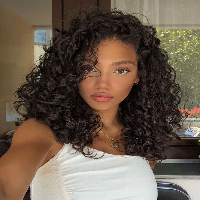

In [5]:
path= './data/train/curly/'
name = '00cbad1ffe22d900018e5a2e7376daed4.jpg'
img = load_img(f'{path}/{name}', target_size=(200,200))
img

In [6]:
x = np.array(img)
x

array([[[ 95,  86,  71],
        [ 97,  88,  73],
        [ 97,  88,  73],
        ...,
        [145, 140, 118],
        [146, 141, 119],
        [148, 143, 121]],

       [[ 96,  87,  70],
        [ 98,  89,  72],
        [ 98,  89,  72],
        ...,
        [149, 144, 122],
        [147, 142, 120],
        [147, 142, 120]],

       [[ 98,  87,  67],
        [100,  89,  69],
        [101,  90,  72],
        ...,
        [152, 147, 125],
        [146, 141, 119],
        [148, 143, 121]],

       ...,

       [[116,  82,  57],
        [117,  83,  58],
        [118,  84,  59],
        ...,
        [219, 218, 213],
        [221, 220, 215],
        [223, 222, 217]],

       [[116,  82,  57],
        [118,  84,  59],
        [118,  84,  59],
        ...,
        [221, 220, 215],
        [222, 221, 216],
        [221, 220, 215]],

       [[120,  86,  61],
        [121,  87,  62],
        [119,  85,  60],
        ...,
        [216, 215, 210],
        [217, 216, 211],
        [222, 221, 216]]

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

- binary crossentropy

## Configure and Set up the model

1. The shape for input should be (200, 200, 3)
2. Next, create a convolutional layer (Conv2D):
- Use 32 filters
- Kernel size should be (3, 3) (that's the size of the filter)
- Use 'relu' as activation
3. Reduce the size of the feature map with max pooling (MaxPooling2D)
- Set the pooling size to (2, 2)
4. Turn the multi-dimensional result into vectors using a Flatten layer
5. Next, add a Dense layer with 64 neurons and 'relu' activation
6. Finally, create the Dense layer with 1 neuron - this will be the output
- The output layer should have an activation - use the appropriate activation for the binary classification case

7. As optimizer use SGD with the following parameters: SGD(lr=0.002, momentum=0.8)

### Creating the convolutional layer

`keras.layers.Conv2D` creates a convolutional kernel.

- `filters`: int, the dimension of the output space, the number of filters in the convolution
- `kernel_size`: int or tuple, the size of the convolution window

### Reducing the size of the feature map

`keras.layers.MaxPooling2D` downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. 

- `pool_size`: int, tuple, factors by which to downscale (dim1, dim2).

### Convert to vectors using `Flatten`

The `keras.layers.Flatten` function flattens the input.

### Dense Layers

`keras.layers.Dense` creates a Dense layer

- `units`: the first parameter is the dimensionality of the space

In [7]:
# Basic Architecture
input_shape = (200,200,3)
filters = 32
kernel_size = (3,3)
pool_size = (2,2)
size_inner=64
num_classes = 1

inputs = keras.Input(shape=input_shape)

x = keras.layers.Conv2D(filters, kernel_size,activation='relu')(inputs)

vectors = keras.layers.MaxPooling2D(pool_size=pool_size)(x)

vectors = keras.layers.Flatten()(vectors)

vectors = keras.layers.Dense(size_inner, activation='relu')(vectors)

outputs = keras.layers.Dense(num_classes, activation='sigmoid')(vectors)

model = keras.Model(inputs, outputs)

# Optimizer
lr=0.002
momentum=0.8

optimizer = keras.optimizers.SGD(learning_rate=lr, momentum=momentum)

# Loss
loss = keras.losses.BinaryCrossentropy() #set from_logits to False here because used activation='sigmoid' above

# Compile model
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

I0000 00:00:1733502853.192225    2507 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5


In [8]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 313632)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    20,072,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

### Question 2

What's the total number of parameters of the model? You can use the summary method for that.

- 20,073,473

## Prepare the train and test data

ImageDataGenerator allows you to automatically load, transform, and feed images into your model.

Use `ImageDataGenerator(rescale=1./255)` for both train and test datasets.

**Why rescale?**

This is used to normalize or scale the pixel values of your images. By default, pixel values range from 0 to 255 but neural networks often perform better when the input are normalized to a smaller range e.g. 0 to 1 or -1 to 1.

By setting this parameter to 1./255 it will divide every pixel value by 255. Tada! They are all now in the range between 0 and 1.

Note that we use 1./255 and not 1/255 to ensure that Python does not perform integer division and conclude the outcome should be 0. In reality since we're using Python3 this is no longer an issue (it was for Python2) but we maintain this practice for safety.

### flow_from_directory

- `class_mode`: this is used to tell Keras how to interpret your folder structure and how the labels should be formatted. Remember in our multiclassification model how each folder was interpreted as a class. For this binary classification we should use `binary` to indicate that we have two classes only.
- `shuffle`: set to True (default) it shuffles the images randomly before feeding them to the model ensuring order the images are fed to the model doesn't affect the categorisation
- `batch_size`: controls how many images are loaded into memory and passed to the model during each training step
- `target_size`: this is the dimensions to which all images in the dataset should be resized before being fed to the model. Most models expect input images to have a consistent size. Often target sizes are squares

In [9]:
gen = ImageDataGenerator(rescale=1./255)

train_ds = gen.flow_from_directory('./data/train',
                                   target_size=(200,200), # resize images to 200x200
                                   batch_size=20, 
                                   shuffle=True,
                                   class_mode='binary')

val_ds = gen.flow_from_directory('./data/test',
                                   target_size=(200,200), # resize images to 200x200
                                   batch_size=20, 
                                   shuffle=True,
                                   class_mode='binary')

Found 800 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


## Train our model

In [10]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1733502855.151454    2574 service.cc:148] XLA service 0x7f9cd8004a90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733502855.151485    2574 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-12-06 16:34:15.170270: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733502855.251361    2574 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-06 16:34:15.536919: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[20,32,198,198]{3,2,1,0}, u8[0]{0}) custom-call(f32[20,3,200,200]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"

 1/40 ━━━━━━━━━━━━━━━━━━━━ 1:27 2s/step - accuracy: 0.4500 - loss: 0.7066

I0000 00:00:1733502856.676586    2574 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.5605 - loss: 0.7413

2024-12-06 16:34:21.444397: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[20,32,198,198]{3,2,1,0}, u8[0]{0}) custom-call(f32[20,3,200,200]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - accuracy: 0.5617 - loss: 0.7397 - val_accuracy: 0.5672 - val_loss: 0.6958
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.6754 - loss: 0.5880 - val_accuracy: 0.6468 - val_loss: 0.6150
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.7375 - loss: 0.5405 - val_accuracy: 0.6169 - val_loss: 0.6652
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.7251 - loss: 0.5567 - val_accuracy: 0.6468 - val_loss: 0.5996
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.7576 - loss: 0.4882 - val_accuracy: 0.6866 - val_loss: 0.6006
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.7573 - loss: 0.5146 - val_accuracy: 0.6517 - val_loss: 0.6079
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.7834 - loss: 0.4662 - val_accuracy: 0.6468 - val_loss: 0.6263
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.7612 - loss: 0.5048 - val_accuracy: 0.6716 - val_

In [11]:
history.history['accuracy']

[0.6100000143051147,
 0.6775000095367432,
 0.7287499904632568,
 0.7212499976158142,
 0.7262499928474426,
 0.7724999785423279,
 0.7987499833106995,
 0.7637500166893005,
 0.8149999976158142,
 0.8075000047683716]

In [12]:
np.median(history.history['accuracy'])

np.float64(0.7462500035762787)

In [13]:
# np.median(history.history['val_accuracy'])

In [14]:
history.history['loss']

[0.6786180138587952,
 0.583522379398346,
 0.547775387763977,
 0.565423309803009,
 0.5242918133735657,
 0.4925689697265625,
 0.45322486758232117,
 0.4901457726955414,
 0.4199568033218384,
 0.4241778552532196]

In [15]:
np.std(history.history['loss'])

np.float64(0.07569671535102047)

In [16]:
# np.std(history.history['val_loss'])

### Question 3

What is the median of training accuracy for all the epochs for this model?

- 0.7618750035762787 (first time running)
- 0.671875 (next)
- 0.7462500035762787 (latest)

### Question 4

What is the standard deviation of training loss for all the epochs for this model?

- 0.08613644152652976 (first time running)
- 0.05669473133041204 (next)
- 0.07569671535102047 (latest)

In [17]:
gen_aug = ImageDataGenerator(rescale=1./255,
                            rotation_range=50,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             fill_mode='nearest')

train_aug_ds = gen_aug.flow_from_directory('./data/train',
                                   target_size=(200,200), # resize images to 200x200
                                   batch_size=20, 
                                   shuffle=True,
                                   class_mode='binary')

# Train the same model for 10 more epochs
history_aug = model.fit(train_aug_ds, epochs=10, validation_data=val_ds)

Found 800 images belonging to 2 classes.
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 266ms/step - accuracy: 0.6615 - loss: 0.6020 - val_accuracy: 0.7214 - val_loss: 0.5487
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 261ms/step - accuracy: 0.6825 - loss: 0.5820 - val_accuracy: 0.7114 - val_loss: 0.5426
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 264ms/step - accuracy: 0.7056 - loss: 0.5744 - val_accuracy: 0.7065 - val_loss: 0.5824
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 261ms/step - accuracy: 0.7040 - loss: 0.5875 - val_accuracy: 0.7065 - val_loss: 0.5668
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 264ms/step - accuracy: 0.6530 - loss: 0.6073 - val_accuracy: 0.7313 - val_loss: 0.5485
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 261ms/step - accuracy: 0.7079 - loss: 0.5627 - val_accuracy: 0.7015 - val_loss: 0.5744
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 264ms/step - accuracy: 0.7256 - loss: 0.5466 - val_accuracy: 0.7562 - val_loss: 0.5287
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 261ms/step - a

In [18]:
history_aug.history['val_loss']

[0.5486611723899841,
 0.5426156520843506,
 0.5823562145233154,
 0.566819965839386,
 0.5485226511955261,
 0.5744481682777405,
 0.5286689400672913,
 0.5293604731559753,
 0.5667522549629211,
 0.5607365369796753]

In [19]:
np.mean(history_aug.history['val_loss'])

np.float64(0.5548942029476166)

### Question 5

What is the mean of test loss for all the epochs for the model trained with augmentations?

- 0.6056306779384613 (first time)
- 0.5548942029476166 (latest)

In [20]:
history_aug.history["val_accuracy"]

[0.7213930487632751,
 0.711442768573761,
 0.7064676880836487,
 0.7064676880836487,
 0.7313432693481445,
 0.7014925479888916,
 0.7562189102172852,
 0.746268630027771,
 0.7213930487632751,
 0.7363184094429016]

In [21]:
last_5 = history_aug.history["val_accuracy"][5:]
last_5

[0.7014925479888916,
 0.7562189102172852,
 0.746268630027771,
 0.7213930487632751,
 0.7363184094429016]

In [22]:
np.mean(last_5)

np.float64(0.7323383092880249)

### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

- 0.6616915464401245 (first time)
- 0.7323383092880249 (last)
